# AI Final Project - Image Classification

# Rutgers University

## Dhiraj Deelip Gandhi (ddg74) $\;\;\;\;\;\;$ Harsh Bhatt (hb371)

## Supervised by -  Professor Abdeslam Boularis 

## Feature Extraction - Single Pixel

Our Input Data contains ['#','+'] as pixel values and we consider a weight of 1 for each of these. Having different values for these characters gives the same result. We transform our input data into binary values depending on the characters.

In [ ]:
pixelChars = ['#', '+']

def countPixels(self, line):
    count = 0

    if char in self.pixelChars:
        count += 1

    return count

## Feature Extraction - Grid of Pixels

We have considered successive grids of size n*\n as our features to give a better description of input to our classifier. This gave us amazing result improvements increasing accuracy over 10% for every classifier. We calculate total sum of pixels which are valued 1, for a GRID of size n\*n and store this as our feature.   

We observed the following error rate for varied grid sizes for our classifiers.

In [ ]:
#TODO: classifier per grid size results (graph maybe)
print

## Dataset

We have **FACE** and **DIGIT** datasets. We have combined the Training and Validation Datasets for our Training. The Testing dataset is purely used for Testing. 

# Classifier Algorithms 

<br> <hr> <hr> <br>

## 1. Perceptron 

*Perceptron* is a supervised learning algorithm where we train our algorithm from a *labeled* training dataset.

Weight matrix is of SHAPE as below and we initialize our weights with random numbers. Every LABEL has a weight array of FEATURES + 1 length. The + 1 is for the bias weight.

In [ ]:
def __init__(self, FEATURES, LABELS):
    self.SHAPE = (LABELS, FEATURES + 1)  # The +1 is for our w0 weight.
    self.weightMatrix = np.zeros(self.SHAPE)

### Training :

For Traning, we calculate the dot product between the weights and feature values and sum up these. We do this for all the labels and find the probabilities. 

In [ ]:
def runModel(self, isTrain, featureValueList, actualLabel):
    for labelWeights in self.weightMatrix:
        featureScoreList.append(np.sum(np.dot(labelWeights, featureValueList)))

The maximum probability is our predicted Label

In [ ]:
predictedLabel = np.argmax(featureScoreList)

### Weight updation :
If the predicted and actual lables do not match, we update the weights by adding/subtracting the feature values. 

In [ ]:
if predictedLabel != actualLabel:
    if isTrain:
        self.updateWeights(predictedLabel, actualLabel, featureValueList)
    else: return 1
else: return 0
    
def updateWeights(self, predictedLabel, actualLabel, featureValueList):
    self.weightMatrix[actualLabel] = self.weightMatrix[actualLabel] + featureValueList
    self.weightMatrix[predictedLabel] = self.weightMatrix[predictedLabel] - featureValueList

### Observations

In [ ]:
%run -i dataclassifier.py --input=FACE --gridSize=3 --smoothingValue=0.001 --classifier=PERCEPTRON  --percentIncrement=10

In [ ]:
%run -i dataclassifier.py --input=DIGIT --gridSize=3 --smoothingValue=0.001 --classifier=PERCEPTRON  --percentIncrement=10

### **Advantages**
- Perceptrons have the ability to learn themselves the complex relationships and patterns in the dataset.
- We can have any type of input. It does not restrict to use any one datatype as inputs.
- If we have a single layer of perceptron, then the training is very quick.
- Is really accurate for image processing and character recognition.

### **Disadvantages**
- A single layer of perceptron cannot train a problem whose solution is a non-linear function.
- Multi layer perceptron takes more time to train.
- Difficult optimization if we have a lot of local minima/maxima.

<br> <hr> <hr> <br>

## 2. Naive Bayes Classifier
*Naive Bayes Classifier* is a part of the probabilistic classifiers based on Bayes' Theorem. The formula for Bayes' theorem is $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$. There are two assumptions taken in this algorithm.
- That the feature is independent.
- The importance of every feature is equal.

### Initialization
2 maps to store our frequency count probabilities

In [ ]:
# Initialization of FMAP - FEATURES X LABELS X POSSIBLE_VALUES
for featureIndex in range(self, self.FEATURES):
    for labelIndex in range(self.LABELS):
        for possibleValueIndex in POSSIBLE_VALUES:
            self.FeatureMap[featureIndex][labelIndex][possibleValueIndex] = 0

# Initialization of LMAP - LABELS
for labelIndex in range(self, 0, self.LABELS):
    self.LabelMap[labelIndex] = 0

### Training
We fill the 2 maps initialized, with our input data features frequency and then calculate the $LOG(P(frequency)))$

In [ ]:
def constructLabelsProbability(self, trainingLabels):
    # Storing Frequency
    for label in trainingLabels: self.LabelMap[label] += 1

    # Calculating probability -> frequency/total -> LOG
    for key in self.LabelMap:
        probability = self.LabelMap[key] / totalDataset
        self.LabelMap[key] = probability

def constructFeaturesProbability(self, featureValueListForAllTrainingImages, actualLabelForTrainingList, POSSIBLE_VALUES):

    # TRAINING
    for label, featureValuesPerImage in zip(actualLabelForTrainingList, featureValueListForAllTrainingImages):
        for feature in range(0, self.FEATURES):
            self.FeatureMap[feature][label][featureValuesPerImage[feature]] += 1

    # Then Converting frequencies to probabilities and then to it's LOG

### Testing :

- For every label, we calculate the $P(features|label)$ using Bayes' theorem as below. 
- We calculate in terms of LOGs because multiplying many probabilities together can result in underflow.

In [ ]:
def predictLabel_GivenFeatures(self, featuresListOfImage):
    for label in self.LabelMap:
        P_Y = self.LabelMap.get(label)
        for feature in range(0, self.FEATURES):
            P_features_given_Y += math.log(self.FeatureMap[feature][label][featuresListOfImage[feature]])
        
        probability = math.log(P_Y, 2) + P_features_given_Y
        probabilityPerLabel.append(probability)

In [ ]:
predictedLabel = np.argmax(probabilityPerLabel)

### Laplace Smoothing
- If the algorithm does not see any connections between $A$ and $B$ in the formula, it would give $P(A|B) = 0$. 
- We have used *Laplace Smoothing* to get rid of any probabilities leading to 0.
- We experimented with the smoothing value with these values and found the corresponding results.

In [ ]:
kgrid = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 50]

In [ ]:
%run -i dataclassifier.py --input=DIGIT --gridSize=3 --smoothingValue=0.001 --classifier=NAIVEBAYES  --percentIncrement=100

## Observations 

In [ ]:
%run -i dataclassifier.py --input=FACE --gridSize=3 --smoothingValue=0.001 --classifier=NAIVEBAYES  --percentIncrement=10

In [ ]:
%run -i dataclassifier.py --input=DIGIT --gridSize=3 --smoothingValue=0.001 --classifier=NAIVEBAYES  --percentIncrement=10

**Advantages**
- It is easy to implement.
- Requires just small amount of data to establish the beliefs.
- It is less sensitive to lost data.
- Speed of training and testing is pretty high

**Disadvantages**
- We need prior probability.
- The assumption that all the features are independent.
- If there is a test data that was not seen during training, then the probability of this data would be 0.

<br> <hr> <hr> <br>

## 3. K-Nearest Neighbors(KNN)

*KNN* algorithm predicts on the basis that similar items are together. This uses the classification method to identify in which class the new data belongs. It is also called lazy learning as there is no training. The algorithm learns when the testing is performed. So, during the training time, the algorithm just stores the feature values and the labels of the data.

### Training: Actually just Storing the Training dataset

In [ ]:
def storeTrainingSet(self, featuresPerImage, labelForImage):
    self.features += featuresPerImage
    self.labels += labelForImage

Currently, we pass the number of neighbors $k=20$ but the value of $k$ depends on the datasize

This is the main function of the code. All other classes are imported in this file and are accessed here as required.

### Testing:

We use **Eucledian distance** to calculate the distance of the new data from the all the trainingset data points.
- Sorts these data points according to the distance
- Finds nearest k neighbors
- Find the frequent label amongst these neighbors - This label is our predicted label

In [ ]:
# Locate the most similar neighbors
def get_neighbors(self, featureForTestImage, labelForTestImage):
    
    for featureTrainingImage, labelTrainingImage  in zip(self.features, self.labels):
        dist = euclidean_distance(featureTrainingImage, labelTrainingImage)
        distances.append((featureTrainingImage, labelTrainingImage, dist))

    distances.sort(key=lambda tup: tup[2]) # Sort according to the dist
    for i in range(self.num_neighbors):
        neighbors.append(distances[i][1])
    return neighbors

neighbors = self.get_neighbors(test_row)
predictedLabel = most_frequent(neighbors)

**Advantages**
- No training period. Learns when testing the data.
- Can accept new data flexibly.
- Easy to implement.

**Disadvantages**
- We need to standardize the input to scale them for appropriate predictions.
- If some data is missing or the dataset has some error, it can give wrong predictions.

In the below section, we have run the Perceptron algorithm with percent increment of 10. The final error on this algorithm was 22% which means the **accuracy** is 78%.

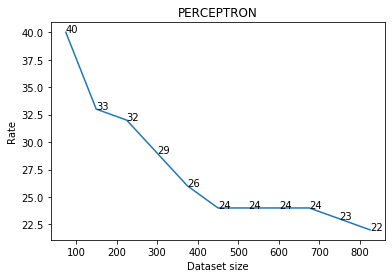

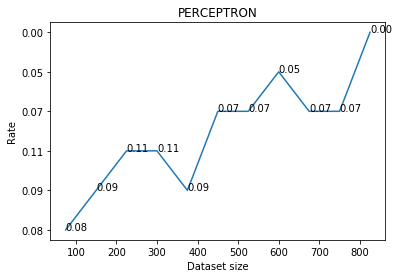

In [2]:
%run -i "dataclassifier.py" --input=FACE --gridSize=3 --smoothingValue=0.001 --classifier=PERCEPTRON  --percentIncrement=10

We run the Naive Bayes algorithm now. The error rate is low with just 19%. **Accuracy** is therefore 81%.

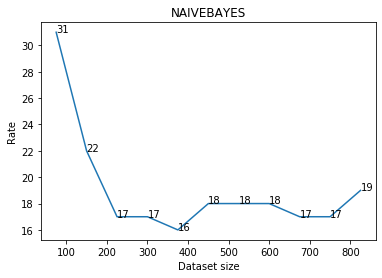

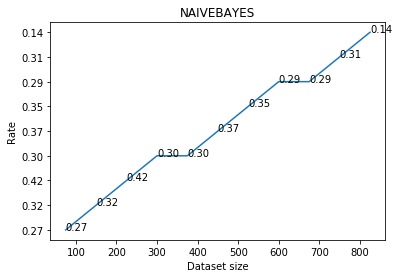

In [9]:
%run -i "dataclassifier.py" --input=FACE --gridSize=3 --smoothingValue=0.001 --classifier=NAIVEBAYES  --percentIncrement=10

Now running the third algorithm that we implemented, we got the error rate of 25%. So, the accuracy is 75%.

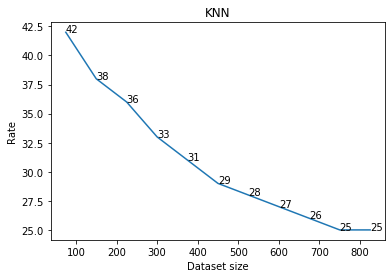

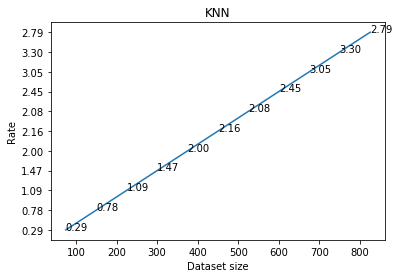

In [10]:
%run -i "dataclassifier.py" --input=FACE --gridSize=3 --smoothingValue=0.001 --classifier=KNN  --percentIncrement=10